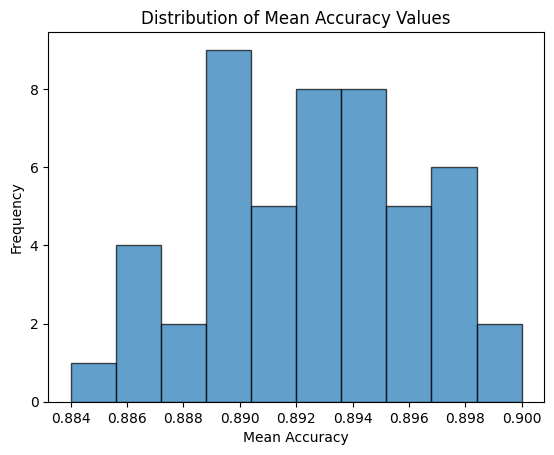

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate a dummy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Parameters
k = 5  # number of folds
num_repeats = 50  # number of repetitions

# Store mean accuracy values
mean_accuracy_values = []

for _ in range(num_repeats):
    # Shuffle the dataset
    indices = np.random.permutation(len(X))
    X, y = X[indices], y[indices]
    
    # Perform k-fold cross-validation
    kf = KFold(n_splits=k)
    accuracy_values = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Test the model
        y_pred = model.predict(X_test)
        
        # Compute the performance metric
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    
    # Calculate the mean accuracy for this round of cross-validation
    mean_accuracy = np.mean(accuracy_values)
    mean_accuracy_values.append(mean_accuracy)

# Plot the distribution of mean accuracy values
plt.hist(mean_accuracy_values, bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Mean Accuracy Values')
plt.xlabel('Mean Accuracy')
plt.ylabel('Frequency')
plt.show()
